In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
dataset = pd.read_csv('/content/data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
dataset = dataset.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')
dataset['diagnosis'] = dataset['diagnosis'].map({'M':1, 'B':0})

In [7]:
# Separate features and target
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=30))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5839 - loss: 0.6881 - val_accuracy: 0.7802 - val_loss: 0.5635
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8446 - loss: 0.5185 - val_accuracy: 0.8791 - val_loss: 0.4421
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9189 - loss: 0.4182 - val_accuracy: 0.8901 - val_loss: 0.3613
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9459 - loss: 0.3182 - val_accuracy: 0.8901 - val_loss: 0.3030
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9351 - loss: 0.2589 - val_accuracy: 0.9011 - val_loss: 0.2615
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9481 - loss: 0.2062 - val_accuracy: 0.9231 - val_loss: 0.2296
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9490 - loss: 0.1997 - val_accuracy: 0.9231 - val_loss: 0.2061
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9520 - loss: 0.1758 - val_accuracy: 0.9231 

In [15]:
#Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9703 - loss: 0.1157
Test Accuracy: 96.49%


In [16]:
# Step 9: Predict and Analyze
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Threshold

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [17]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



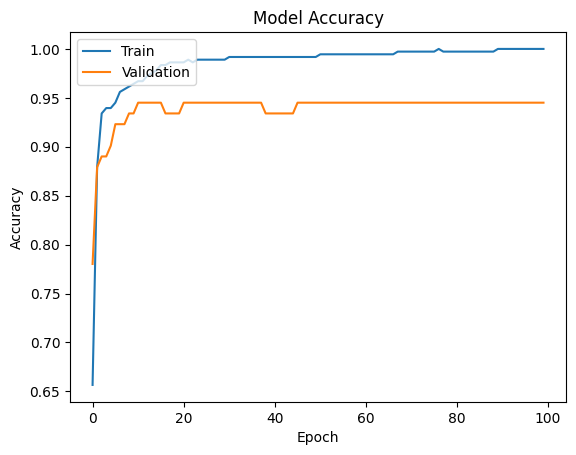

In [18]:
# Step 10: Plot training history
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

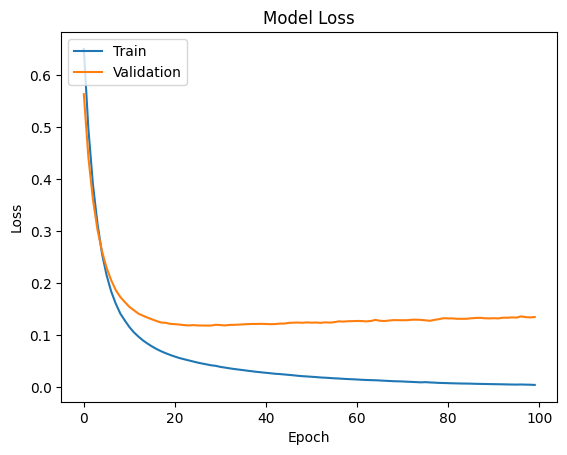

In [19]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
# TESTING
# Example of custom input (30 features)

custom_input = np.array([[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776,
                          0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053,
                          8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587,
                          0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0,
                          0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]])

# Scale custom input
custom_input_scaled = scaler.transform(custom_input)

# Predict using the model
prediction = model.predict(custom_input_scaled)

# Convert prediction to class label
predicted_class = (prediction > 0.5).astype(int)

# Interpret the result
if predicted_class == 1:
    print("The model predicts: Malignant Tumor (Cancerous)")
else:
    print("The model predicts: Benign Tumor (Non-Cancerous)")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
The model predicts: Malignant Tumor (Cancerous)


In [22]:
# TESTING
# Example of custom input (30 features)

custom_input = np.array([[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776,
                          0.301, 0.471, 0.419, 0.07871, 1.095, 0.9053,
                          8.589, 153.4, 0.399, 0.04904, 0.05373, 0.01587,
                          0.03, 0.93, 25.38, 17.33, 184.6, 2019.0,
                          0.622, 0.656, 0.7119, 0.2654, 0.4601, 0.1189]])

# Scale custom input
custom_input_scaled = scaler.transform(custom_input)

# Predict using the model
prediction = model.predict(custom_input_scaled)

# Convert prediction to class label
predicted_class = (prediction > 0.5).astype(int)

# Interpret the result
if predicted_class == 1:
    print("The model predicts: Malignant Tumor (Cancerous)")
else:
    print("The model predicts: Benign Tumor (Non-Cancerous)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The model predicts: Benign Tumor (Non-Cancerous)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
